In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt


## Variables de prueba

Serie Original  SEV = S3-LCVER-CAZ

AB/2 de adquisicion = [2.0, 5.0, 10.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 92.0, 93.0, 95.0, 100.0] }

Rhoa adquiridos en campo = [1, 2.6, 13.6, 2.21, 2.26, 8.80, 7.46, 14.37, 36.49, 31.1, 4.67, 7.50, 13.87, 11.66, 46.65, 34.52, 45.64, 52.91, 8.90, 27.48, 22.23, 30.99, 40.04]

Primera evaluación se realiza un pronostico de los intervalos no muestreados de Rhoa y integrados en las aparturas ab2, correspondiente a los valores 876, 87, 88, 97 y 98, evaluando el pronostoco para estos intervalos

# Test 3

# LAMPAZO DEL NARANJO  S1-LN-EBSA

In [2]:
#LAMPAZO DEL NARANJO
# datos correspondientes a SEV en Lampazos del naranjo, sitio no integrado en el entrenamiento
ab2_values = [     2,      3,     5,     8,    10,    10,    12,    15,    25,    30,    45,    55,    65,    75,    85,    95,   110,   130,   140,    150,    170,    190,    210,    220,    240,    260,    280,    300,    310,      320]
rhoa_data =      [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.40, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 0, 241.76, 0, 376.99, 122.61, 0, 0, 0, 17157.28]
rhoa_original =  [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.40, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 116.13, 241.76, 402.26, 376.99, 122.61, 363.33, 147.65, 103.69, 17157.28]
ab2_data = ab2_values
n_points = 30

## RF

In [3]:
rf_multi = joblib.load("random_forest_multioutput_v2.joblib")  
X_cols_original = joblib.load("random_forest_feature_columns_v2.joblib")  

Rhoa observados: [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 0, 241.76, 0, 376.99, 122.61, 0, 0, 0, 17157.28]
Rhoa predichos (completos): [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 304.1905541927612, 241.76, 364.9553763113497, 376.99, 122.61, 456.79358433734296, 505.13160876313094, 537.435070794872, 17157.28]


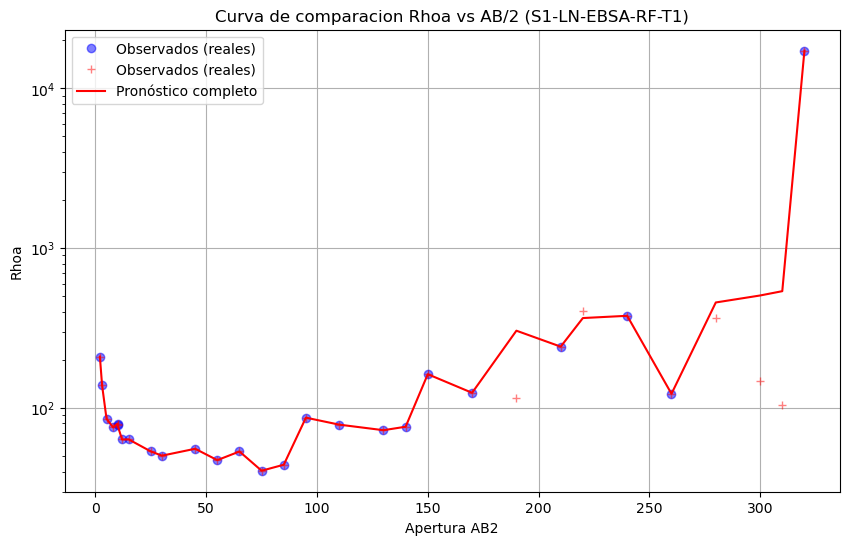

In [4]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols

df_new = pd.DataFrame(columns=X_cols_original)
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]

for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]

y_pred = rf_multi.predict(df_new)[0] 

rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]

print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)

plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5)
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Apertura AB2')
plt.ylabel('Rhoa')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-LN-EBSA-RF-T1)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-LN-EBSA-RF-T1.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

## GRB

In [5]:
gbr_multi = joblib.load("gbr_multioutput_v2.joblib")
X_cols_original = joblib.load("gbr_feature_columns_v2.joblib")

Rhoa observados: [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 0, 241.76, 0, 376.99, 122.61, 0, 0, 0, 17157.28]
Rhoa predichos (completos): [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 266.2790229364683, 241.76, 174.81980407294247, 376.99, 122.61, 323.4330411129, 406.1123162096504, 474.9742045304281, 17157.28]


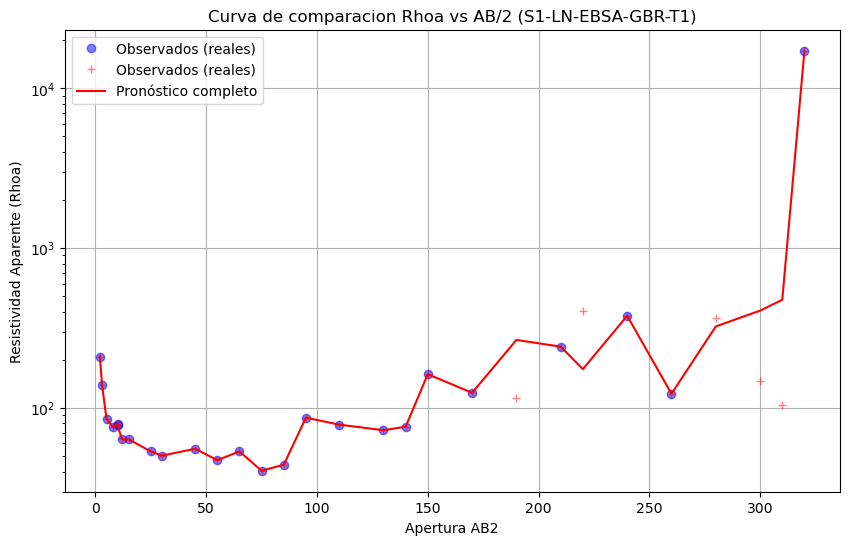

In [6]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]

for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]

y_pred = gbr_multi.predict(df_new)[0]

rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]

print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)

plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5)
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-LN-EBSA-GBR-T1)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-LN-EBSA-GBR-T1.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

Rhoa predichos (completos): [14.4, 81.15, 15.35, 26.64, 44.02, 75.55, 29.1, 27.57, 44.08, 8.05, 19.31, 26.602318090798132, 17.860309917803328, 15.16833675091321, 11.84677565732481, 9.175542713638869, 6.261417495089926, 7.389681687618631, 5.254099184152225, 7.435249815603227, 7.205924187380515]

Rhoa predichos (completos): [14.4, 81.15, 15.35, 26.64, 44.02, 75.55, 29.1, 27.57, 44.08, 8.05, 19.31, 26.602318090798132, 17.860309917803328, 15.16833675091321, 11.846775657324809, 9.175542713638869, 6.261417495089926, 7.389681687618631, 5.254099184152225, 7.4352498156032265, 7.205924187380515]

## VSM

In [7]:
svm_multi = joblib.load("svm_multioutput_v2.joblib")
X_cols_original = joblib.load("svm_feature_columns_v2.joblib")

Rhoa observados: [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 0, 241.76, 0, 376.99, 122.61, 0, 0, 0, 17157.28]
Rhoa predichos (completos): [209.44, 138.23, 85.57, 75.48, 79.79, 77.79, 63.47, 63.56, 53.44, 50.28, 55.54, 47.15, 53.4, 40.48, 44.13, 86.93, 78.62, 72.56, 76.29, 162.54, 124.33, 1577.1298719851136, 241.76, 1639.426164529309, 376.99, 122.61, 1748.4265369531975, 1794.4716390115175, 1833.0513072138292, 17157.28]


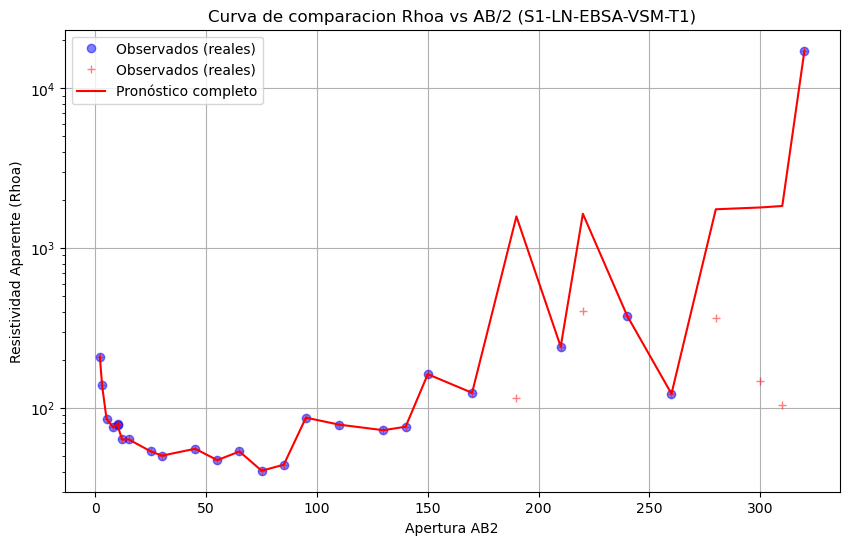

In [8]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols

df_new = pd.DataFrame(columns=X_cols_original) 
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]

for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]

y_pred = svm_multi.predict(df_new)[0] 

rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]

print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)

plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo') 
plt.yscale('log') 
plt.xscale('linear') 
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-LN-EBSA-VSM-T1)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-LN-EBSA-VSM-T1.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# LOS OLIVOS II S1-EGH-OLIVOS

In [9]:
# LOS OLIVOS II  sev 1
ab2_values = [2, 5, 10, 10, 20, 30, 40, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 150, 160, 170, 180, 190, 210, 230, 250]
rhoa_data =  [68.97, 70.54, 98.06, 80.12, 488.98, 1036.73, 0, 0, 90.45, 95.91, 103.92, 0, 109.11, 110.01, 112.33, 115.67, 117.57, 0, 114.43, 114.15, 116.06, 107.76, 0, 0, 0]
rhoa_original =  [68.97, 70.54, 98.06, 80.12, 488.98, 1036.73, 107.91, 86.83, 90.45, 95.91, 103.92, 109.63, 109.11, 110.01, 112.33, 115.67, 117.57, 37.79, 114.43, 114.15, 116.06, 107.76, 112.15, 119.37, 114.78]
n_points = 25

# RF

In [10]:

rf_multi = joblib.load("random_forest_multioutput_v2.joblib")  
X_cols_original = joblib.load("random_forest_feature_columns_v2.joblib")  

Rhoa observados: [68.97, 70.54, 98.06, 80.12, 488.98, 1036.73, 0, 0, 90.45, 95.91, 103.92, 0, 109.11, 110.01, 112.33, 115.67, 117.57, 0, 114.43, 114.15, 116.06, 107.76, 0, 0, 0]
Rhoa predichos (completos): [68.97, 70.54, 98.06, 80.12, 488.98, 1036.73, 312.2258407460324, 181.72945376353462, 90.45, 95.91, 103.92, 102.14028929073653, 109.11, 110.01, 112.33, 115.67, 117.57, 110.23034340403593, 114.43, 114.15, 116.06, 107.76, 89.59864942984433, 80.36435333641087, 77.6371496392051]


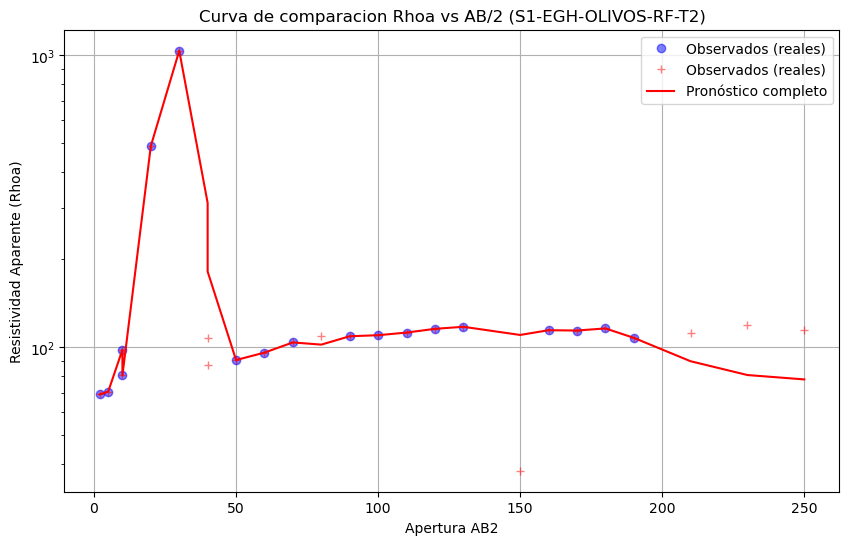

In [11]:

ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original) 
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = rf_multi.predict(df_new)[0]  


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo') 
plt.yscale('log')  
plt.xscale('linear')  
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-EGH-OLIVOS-RF-T2)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-EGH-OLIVOS-RF-T2.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# GBR

In [12]:
gbr_multi = joblib.load("gbr_multioutput_v2.joblib")
X_cols_original = joblib.load("gbr_feature_columns_v2.joblib")

Rhoa observados: [68.97, 70.54, 98.06, 80.12, 488.98, 1036.73, 0, 0, 90.45, 95.91, 103.92, 0, 109.11, 110.01, 112.33, 115.67, 117.57, 0, 114.43, 114.15, 116.06, 107.76, 0, 0, 0]
Rhoa predichos (completos): [68.97, 70.54, 98.06, 80.12, 488.98, 1036.73, 472.506984490131, 292.1176578921441, 90.45, 95.91, 103.92, 85.0657357597418, 109.11, 110.01, 112.33, 115.67, 117.57, 87.31701783569376, 114.43, 114.15, 116.06, 107.76, 93.1773570421928, 105.56444354603929, 99.5434144342723]


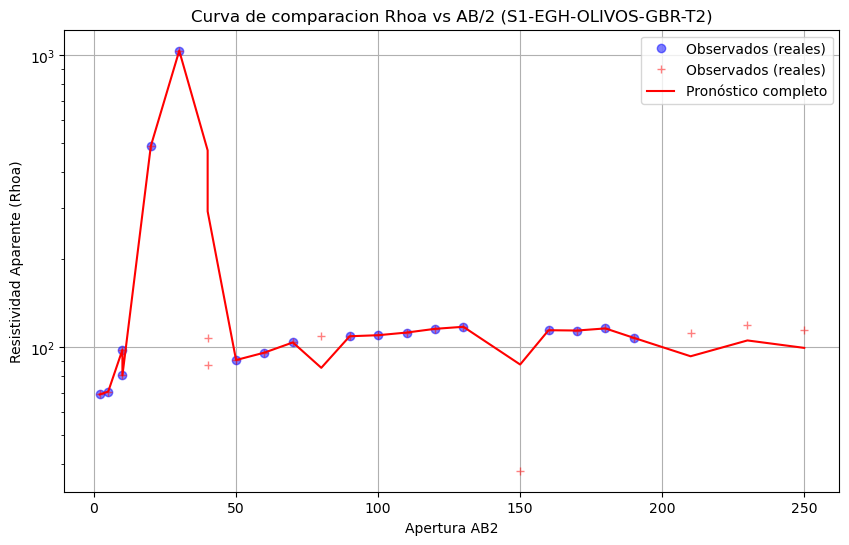

In [13]:

ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)  
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = gbr_multi.predict(df_new)[0]  


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')  
plt.yscale('log')  
plt.xscale('linear') 
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-EGH-OLIVOS-GBR-T2)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-EGH-OLIVOS-GBR-T2.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# SVM

In [14]:
svm_multi = joblib.load("svm_multioutput_v2.joblib")
X_cols_original = joblib.load("svm_feature_columns_v2.joblib") 

Rhoa observados: [68.97, 70.54, 98.06, 80.12, 488.98, 1036.73, 0, 0, 90.45, 95.91, 103.92, 0, 109.11, 110.01, 112.33, 115.67, 117.57, 0, 114.43, 114.15, 116.06, 107.76, 0, 0, 0]
Rhoa predichos (completos): [68.97, 70.54, 98.06, 80.12, 488.98, 1036.73, 285.3788757846031, -357.5256793718325, 90.45, 95.91, 103.92, 212.39076561883144, 109.11, 110.01, 112.33, 115.67, 117.57, 217.13207200373722, 114.43, 114.15, 116.06, 107.76, 212.79213739810825, 209.2819070968378, 211.71290731774002]


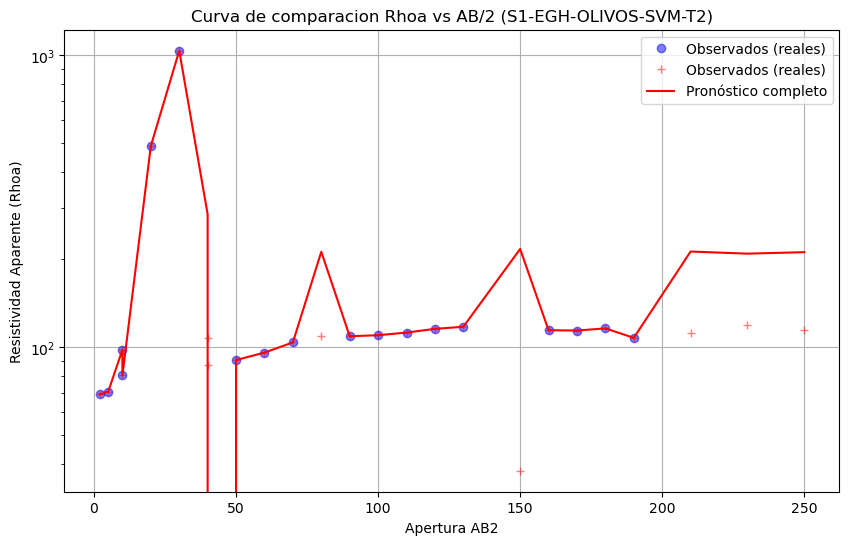

In [15]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = svm_multi.predict(df_new)[0]


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-EGH-OLIVOS-SVM-T2)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-EGH-OLIVOS-SVM-T2.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

## LAMPAZO DEL NARANJO  S2-LN-EBSA

In [16]:
ab2_values =     [    3,      4,     5,      8,     10,     15,    25,   30,   40,    50,    70,    80,    100,    120,   130,   140,    150,    170,    180,    190,    210,    230,    250,    260,    280,    290]
rhoa_data =      [20.11, 176.45, 80.28, 160.85, 301.59, 100.04, 67.04, 9.17, 6.54, 39.46, 48.14, 16.05, 128.33, 873.66, 72.56,     0,      0,      0,      0,      0,      0,      0,      0, 153.89, 313.65, 592.77]
rhoa_original =  [20.11, 176.45, 80.28, 160.85, 301.59, 100.04, 67.04, 9.17, 6.54, 39.46, 48.14, 16.05, 128.33, 873.66, 72.56, 76.29, 159.71, 108.10, 121.31, 130.22, 177.49, 183.46, 194.49, 153.89, 313.65, 592.77]
n_points = 26

# RF

In [17]:
rf_multi = joblib.load("random_forest_multioutput_v2.joblib")  
X_cols_original = joblib.load("random_forest_feature_columns_v2.joblib")  

Rhoa observados: [20.11, 176.45, 80.28, 160.85, 301.59, 100.04, 67.04, 9.17, 6.54, 39.46, 48.14, 16.05, 128.33, 873.66, 72.56, 0, 0, 0, 0, 0, 0, 0, 0, 153.89, 313.65, 592.77]
Rhoa predichos (completos): [20.11, 176.45, 80.28, 160.85, 301.59, 100.04, 67.04, 9.17, 6.54, 39.46, 48.14, 16.05, 128.33, 873.66, 72.56, 133.95080665958315, 120.50130536974109, 113.21016775133332, 117.92509865168502, 132.1548275332826, 132.83915622420486, 166.49979597738027, 199.1535292457171, 153.89, 313.65, 592.77]


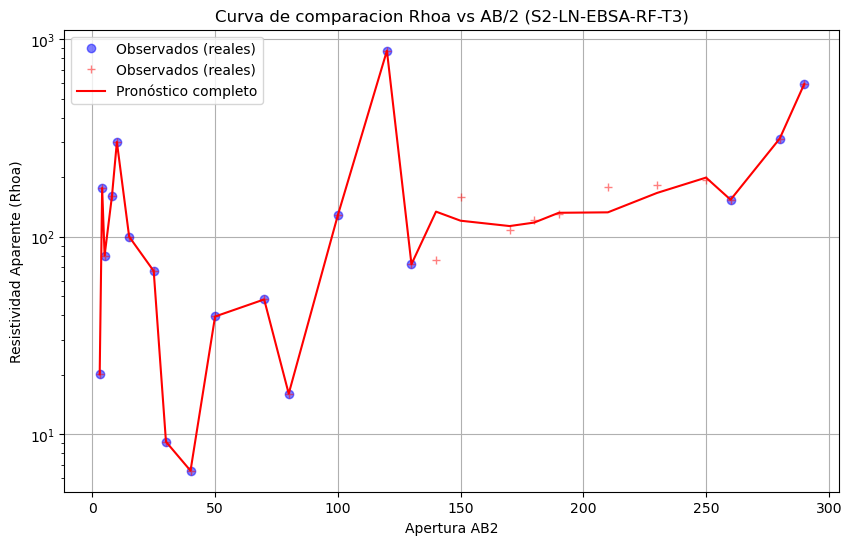

In [18]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original) 
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = rf_multi.predict(df_new)[0]  


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo') 
plt.yscale('log')  
plt.xscale('linear')  
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S2-LN-EBSA-RF-T3)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S2-LN-EBSA-RF-T3.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# GBR

In [19]:
gbr_multi = joblib.load("gbr_multioutput_v2.joblib")
X_cols_original = joblib.load("gbr_feature_columns_v2.joblib")

Rhoa observados: [20.11, 176.45, 80.28, 160.85, 301.59, 100.04, 67.04, 9.17, 6.54, 39.46, 48.14, 16.05, 128.33, 873.66, 72.56, 0, 0, 0, 0, 0, 0, 0, 0, 153.89, 313.65, 592.77]
Rhoa predichos (completos): [20.11, 176.45, 80.28, 160.85, 301.59, 100.04, 67.04, 9.17, 6.54, 39.46, 48.14, 16.05, 128.33, 873.66, 72.56, 204.49308323165903, 122.11693551034605, 159.69733731544497, 160.5552868250916, 209.9830270895054, 97.16716424370509, 126.84670152786885, 144.2857022700746, 153.89, 313.65, 592.77]


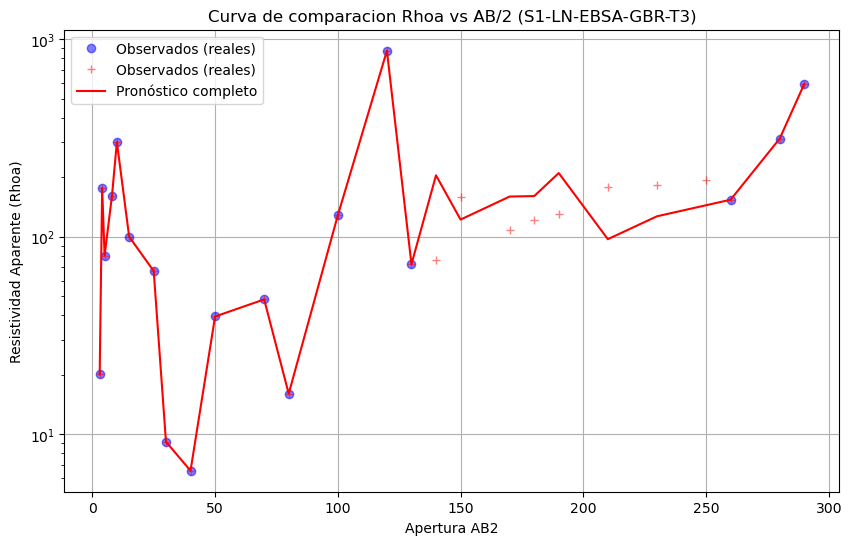

In [20]:

ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)  
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = gbr_multi.predict(df_new)[0]  


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')  
plt.yscale('log')  
plt.xscale('linear') 
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-LN-EBSA-GBR-T3)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-LN-EBSA-GBR-T3.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')


plt.show()

# SVM

In [21]:
svm_multi = joblib.load("svm_multioutput_v2.joblib")
X_cols_original = joblib.load("svm_feature_columns_v2.joblib") 

Rhoa observados: [20.11, 176.45, 80.28, 160.85, 301.59, 100.04, 67.04, 9.17, 6.54, 39.46, 48.14, 16.05, 128.33, 873.66, 72.56, 0, 0, 0, 0, 0, 0, 0, 0, 153.89, 313.65, 592.77]
Rhoa predichos (completos): [20.11, 176.45, 80.28, 160.85, 301.59, 100.04, 67.04, 9.17, 6.54, 39.46, 48.14, 16.05, 128.33, 873.66, 72.56, -126.87192464399631, 290.6354702189449, 295.0027269030743, 300.19451846886886, 305.53232264969165, 305.8628804114321, 304.198075148779, 304.6613291708245, 153.89, 313.65, 592.77]


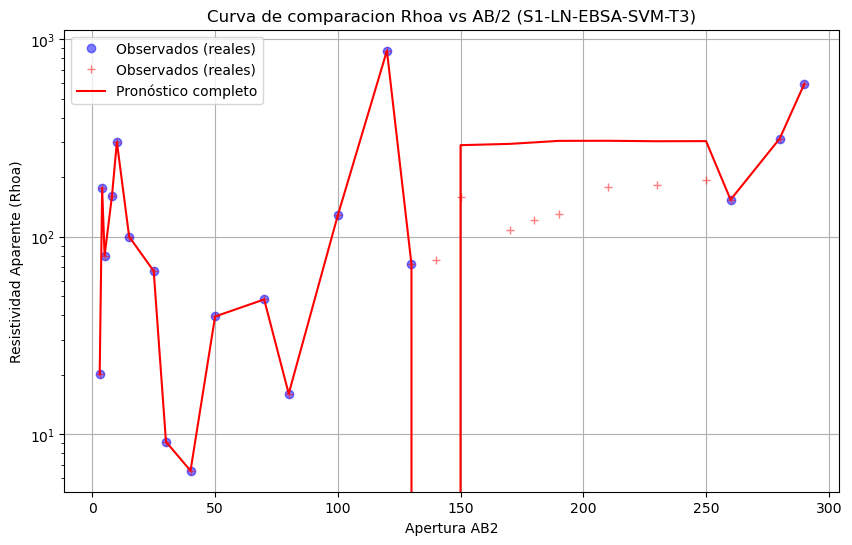

In [22]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = svm_multi.predict(df_new)[0]


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-LN-EBSA-SVM-T3)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-LN-EBSA-SVM-T3.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# EL PINAL S2-ZR-PINAL-EBSA

In [23]:
ab2_values =     [     2,      5,     10,     15,      20,      30,      40,      50,      60,      70,      80,      90,     100,     110]
rhoa_data =      [278.72, 392.90, 596.91, 999.12, 0, 1281.84, 1298.01, 1871.66, 0, 0, 0, 0, 1517.17, 1660.49]
rhoa_original =  [278.72, 392.90, 596.91, 999.12, 1147.81, 1281.84, 1298.01, 1871.66, 2163.81, 1965.60, 1877.89, 1600.08, 1517.17, 1660.49]
n_points = 14

# RF

In [24]:
rf_multi = joblib.load("random_forest_multioutput_v2.joblib")  
X_cols_original = joblib.load("random_forest_feature_columns_v2.joblib")  

Rhoa observados: [278.72, 392.9, 596.91, 999.12, 0, 1281.84, 1298.01, 1871.66, 0, 0, 0, 0, 1517.17, 1660.49]
Rhoa predichos (completos): [278.72, 392.9, 596.91, 999.12, 770.3751501571898, 1281.84, 1298.01, 1871.66, 656.9872873727481, 324.07477075849107, 256.98467936531245, 298.7947430586292, 1517.17, 1660.49]


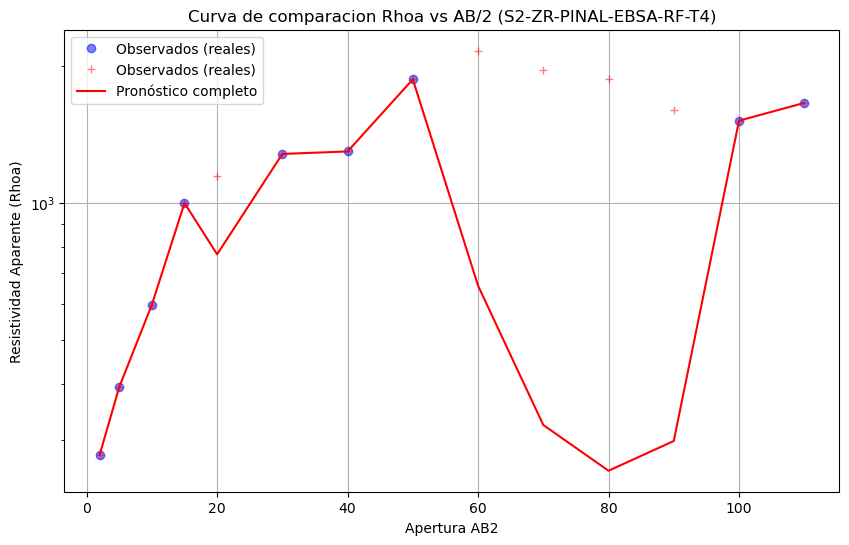

In [25]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original) 
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = rf_multi.predict(df_new)[0]  


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo') 
plt.yscale('log')  
plt.xscale('linear')  
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S2-ZR-PINAL-EBSA-RF-T4)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S2-ZR-PINAL-EBSA-RF-T4.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# GBR

In [26]:
gbr_multi = joblib.load("gbr_multioutput_v2.joblib")
X_cols_original = joblib.load("gbr_feature_columns_v2.joblib")

Rhoa observados: [278.72, 392.9, 596.91, 999.12, 0, 1281.84, 1298.01, 1871.66, 0, 0, 0, 0, 1517.17, 1660.49]
Rhoa predichos (completos): [278.72, 392.9, 596.91, 999.12, 886.980955054616, 1281.84, 1298.01, 1871.66, 450.1213579267359, 398.5542939843753, 401.9460241843815, 335.3439615549822, 1517.17, 1660.49]


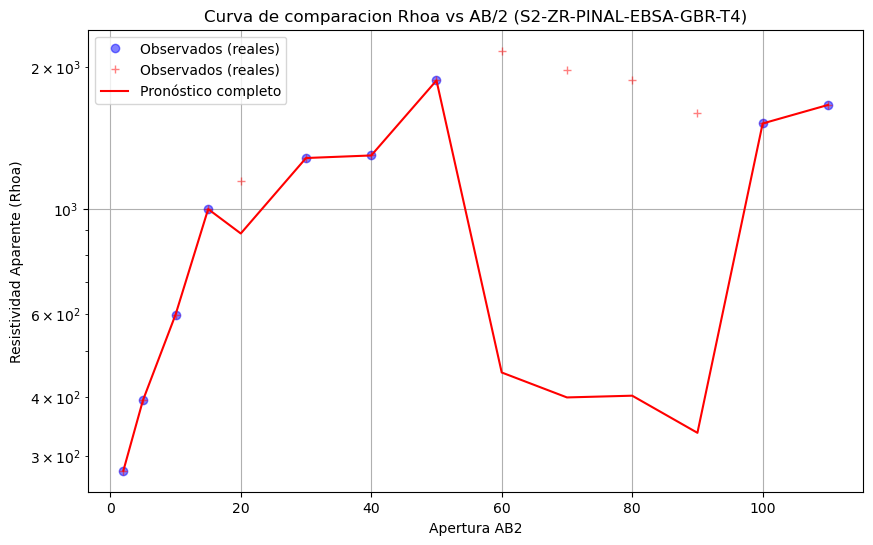

In [27]:

ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)  
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = gbr_multi.predict(df_new)[0]  


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')  
plt.yscale('log')  
plt.xscale('linear') 
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S2-ZR-PINAL-EBSA-GBR-T4)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S2-ZR-PINAL-EBSA-GBR-T4.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# SVM

In [28]:
svm_multi = joblib.load("svm_multioutput_v2.joblib")
X_cols_original = joblib.load("svm_feature_columns_v2.joblib") 

Rhoa observados: [278.72, 392.9, 596.91, 999.12, 0, 1281.84, 1298.01, 1871.66, 0, 0, 0, 0, 1517.17, 1660.49]
Rhoa predichos (completos): [278.72, 392.9, 596.91, 999.12, 678.3476384296985, 1281.84, 1298.01, 1871.66, 795.6615210542693, 825.0849326824837, 818.5470150123905, 855.4007899672661, 1517.17, 1660.49]


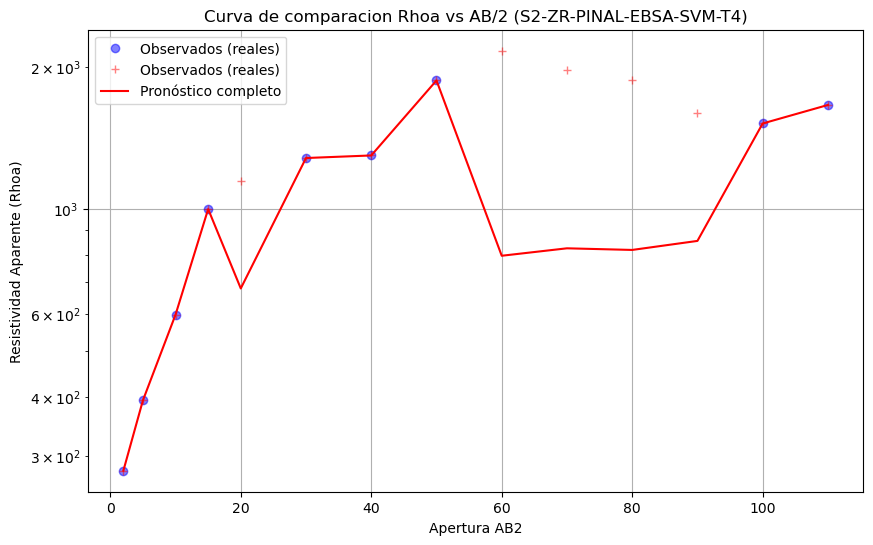

In [29]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = svm_multi.predict(df_new)[0]


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S2-ZR-PINAL-EBSA-SVM-T4)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S2-ZR-PINAL-EBSA-SVM-T4.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# OJO DE AGUA S1-OA-VER

In [30]:
ab2_values =     [   2,     5,   10,   15,   20,   25,   30,   35,   40,   45,   50,   55,    60,   65,    70,    75,   80,    85,   90,   95,   100]
rhoa_data =      [2.49, 15.60, 5.45, 6.15, 6.04, 6.07, 4.74, 0, 0, 0, 0, 0, 13.26, 8.69, 14.39, 12.47, 9.45, 0, 8.36, 9.86, 0]
rhoa_original =  [2.49, 15.60, 5.45, 6.15, 6.04, 6.07, 4.74, 6.09, 5.55, 6.51, 8.66, 5.37, 13.26, 8.69, 14.39, 12.47, 9.45, 24.41, 8.36, 9.86, 28.54]
n_points = 21

# RF

In [31]:
rf_multi = joblib.load("random_forest_multioutput_v2.joblib")  
X_cols_original = joblib.load("random_forest_feature_columns_v2.joblib")  

Rhoa observados: [2.49, 15.6, 5.45, 6.15, 6.04, 6.07, 4.74, 0, 0, 0, 0, 0, 13.26, 8.69, 14.39, 12.47, 9.45, 0, 8.36, 9.86, 0]
Rhoa predichos (completos): [2.49, 15.6, 5.45, 6.15, 6.04, 6.07, 4.74, 3.459596560108529, 4.449967110226883, 4.634287569714232, 5.094084428692116, 7.317290154339429, 13.26, 8.69, 14.39, 12.47, 9.45, 10.80616027291117, 8.36, 9.86, 12.664467930923465]


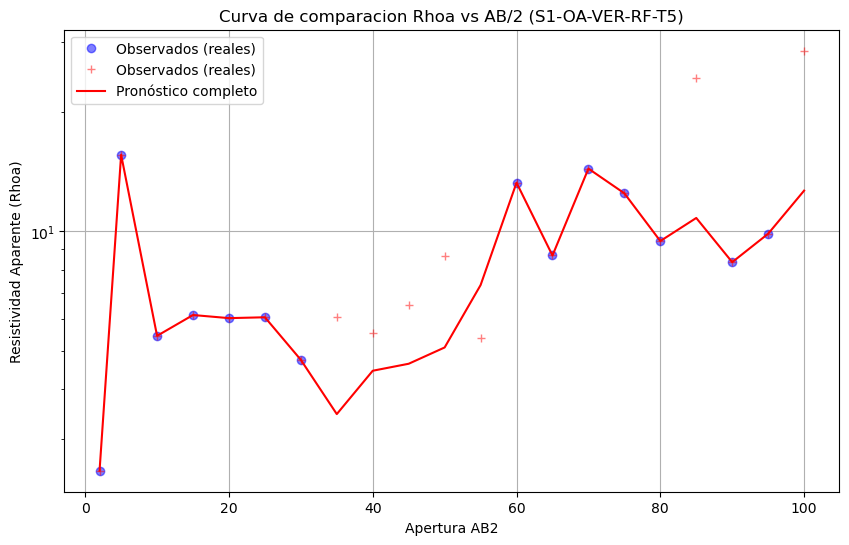

In [32]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = rf_multi.predict(df_new)[0]


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5)
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-OA-VER-RF-T5)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-OA-VER-RF-T5.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# GBR

In [33]:
gbr_multi = joblib.load("gbr_multioutput_v2.joblib")
X_cols_original = joblib.load("gbr_feature_columns_v2.joblib")

Rhoa observados: [2.49, 15.6, 5.45, 6.15, 6.04, 6.07, 4.74, 0, 0, 0, 0, 0, 13.26, 8.69, 14.39, 12.47, 9.45, 0, 8.36, 9.86, 0]
Rhoa predichos (completos): [2.49, 15.6, 5.45, 6.15, 6.04, 6.07, 4.74, 8.06972787432931, 6.428029851829648, 10.156121612498541, 12.893510682562612, 10.096110627854019, 13.26, 8.69, 14.39, 12.47, 9.45, 21.65771233951208, 8.36, 9.86, 18.439193636180473]


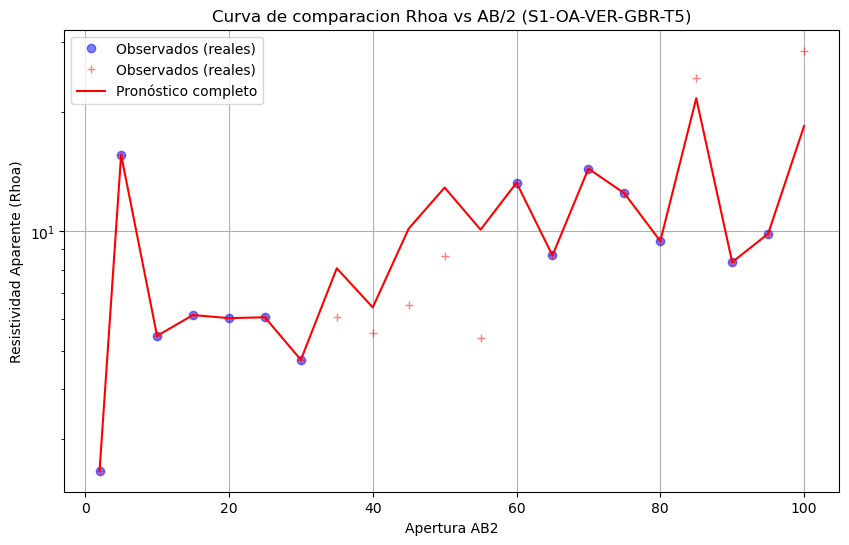

In [34]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)  
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = gbr_multi.predict(df_new)[0]  


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')  
plt.yscale('log')  
plt.xscale('linear') 
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-OA-VER-GBR-T5)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-OA-VER-GBR-T5.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()

# SVM

In [35]:
svm_multi = joblib.load("svm_multioutput_v2.joblib")
X_cols_original = joblib.load("svm_feature_columns_v2.joblib") 

Rhoa observados: [2.49, 15.6, 5.45, 6.15, 6.04, 6.07, 4.74, 0, 0, 0, 0, 0, 13.26, 8.69, 14.39, 12.47, 9.45, 0, 8.36, 9.86, 0]
Rhoa predichos (completos): [2.49, 15.6, 5.45, 6.15, 6.04, 6.07, 4.74, -333.5449625455181, 10.09109679144126, 13.714792671275518, 15.20282349722595, 21.63307553445793, 13.26, 8.69, 14.39, 12.47, 9.45, 34.60023681626785, 8.36, 9.86, 35.511576534863934]


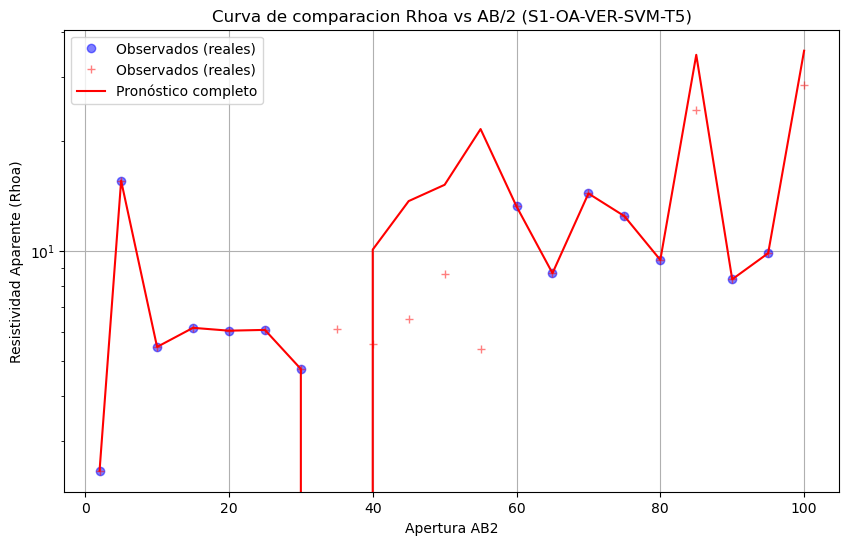

In [36]:
ab2_cols = [f"AB2_{i}" for i in range(1, n_points + 1)]
rhoa_cols = [f"Rhoa_{i}" for i in range(1, n_points + 1)]
indicator_cols = [f"is_observed_{i}" for i in range(1, n_points + 1)]
X_cols = ab2_cols + rhoa_cols + indicator_cols


df_new = pd.DataFrame(columns=X_cols_original)
for i in range(1, n_points + 1):
    df_new[f"AB2_{i}"] = [ab2_values[i-1] if i-1 < len(ab2_values) else 0.0]
    df_new[f"Rhoa_{i}"] = [rhoa_data[i-1] if i-1 < len(rhoa_data) else 0.0]
    df_new[f"is_observed_{i}"] = [1 if (i-1 < len(rhoa_data) and rhoa_data[i-1] != 0) else 0]


for i in range(n_points + 1, 31):
    df_new[f"AB2_{i}"] = [0.0]
    df_new[f"Rhoa_{i}"] = [0.0]
    df_new[f"is_observed_{i}"] = [0]


y_pred = svm_multi.predict(df_new)[0]


rhoa_full = [rhoa_data[i] if i < len(rhoa_data) and rhoa_data[i] != 0 else y_pred[i] for i in range(n_points)]


print("Rhoa observados:", rhoa_data[:n_points])
print("Rhoa predichos (completos):", rhoa_full)


plt.figure(figsize=(10, 6))
plt.plot(ab2_values[:n_points], rhoa_data[:n_points], 'bo', label='Observados (reales)', alpha=0.5)  
plt.plot(ab2_values[:n_points], rhoa_original, 'r+', label='Observados (reales)', alpha=0.5) 
plt.plot(ab2_values[:n_points], rhoa_full, 'r-', label='Pronóstico completo')
plt.yscale('log')
plt.xscale('linear')
plt.xlabel('Apertura AB2')
plt.ylabel('Resistividad Aparente (Rhoa)')
plt.title('Curva de comparacion Rhoa vs AB/2 (S1-OA-VER-SVM-T5)')
plt.legend()
plt.grid(True)

save_path = "imagenes/S1-OA-VER-SVM-T5.png" 
plt.savefig(save_path, dpi=600, bbox_inches='tight')

plt.show()